In [1]:
## Allows for editing of classes, which are updated in this notebook
%load_ext autoreload
%autoreload 2

# Import relevant files

In [2]:
# If you get the warning 
# WARNING: IERSStaleWarning: leap-second file is expired. [astropy.utils.iers.iers]
# upgrade your astropy package
import constellationClasses as cc
import utils as utils

## Import packages for this particular example

In [3]:
import numpy as np
import astropy.units as u
from astropy.time import TimeDelta
from poliastro.bodies import Earth
import matplotlib.pyplot as plt
from poliastro.plotting.static import StaticOrbitPlotter
from poliastro.plotting import OrbitPlotter3D, OrbitPlotter2D
%matplotlib notebook

# Create a satellite

In [4]:
# Create a satellite in a circular orbit
a = 600 * u.km
i = 45 * u.deg
Omega = 0 * u.deg
omega = 0 * u.deg

orb1 = cc.Satellite.circular(Earth, alt = a,
 inc = i, raan = Omega, arglat = omega)

orb1.satID = 1 #give it an identification number

# Create a satellite in a circular orbit, phased 45 deg in raan
Omega45 = 45 * u.deg


orb2 = cc.Satellite.circular(Earth, alt = a,
 inc = i, raan = Omega45, arglat = omega)
orb2.satID = 2

## Plot single satelite

In [5]:
frame = OrbitPlotter3D()
frame.plot(orb1)

## Plot both satellites 

In [6]:
frame = OrbitPlotter3D()
frame.plot(orb1)
frame.plot(orb2)

## Propagate a satellite 

In [7]:
# %debug
#Create a timeDelta object
timeDeltas = TimeDelta(np.arange(0, 86400, 15)*u.s) #propagate for a day every 15 sec

#Run calculation to generate positions (r) and velocity (v) vectors for 
#a satellite. Satellites propagated in the inertial frame (ECI)
orb1.get_rv_from_propagate(timeDeltas)

###  Look at the data

In [8]:
# Position/velocity data stored as attributes in the orbit object

# Use dict to see all attributes
orb1.__dict__

{'_state': <poliastro.twobody.states.ClassicalState at 0x11ee27d68>,
 '_epoch': <Time object: scale='tt' format='jyear_str' value=J2000.000>,
 '_frame': None,
 'satID': 1,
 'planeID': None,
 'note': None,
 'task': None,
 'a': <Quantity 6978136.6 m>,
 'alt': <Quantity 600000. m>,
 'dataMem': [],
 'schedule': [],
 'commsPayload': [],
 'remoteSensor': [],
 'previousTransfer': [],
 'previousSatInteractions': [],
 'ecc': <Quantity 0.>,
 'p': <Quantity 6978136.6 m>,
 'inc': <Quantity 45. deg>,
 'raan': <Quantity 0. deg>,
 'argp': <Quantity 0. deg>,
 'r': <Quantity [6978.1366,    0.    ,    0.    ] km>,
 'v': <Quantity [0.        , 5.34421789, 5.34421789] km / s>,
 'rvECI': <CartesianRepresentation (x, y, z) in km
     [(6978.1366    ,     0.        ,     0.        ),
      (6977.21447334,    80.15973729,    80.15972772),
      (6974.44833773,   160.29828915,   160.29821261), ...,
      (5903.28562533, -2887.99761923, -2342.04572554),
      (5962.5573069 , -2822.23947207, -2271.22163031),
   

In [9]:
# Get position vector
print("position vectors")
print(orb1.rvECI)

# Get velocity vectors
print("velocity vectors")
print(orb1.rvECI._differentials['s']) #get differentials with respect to s (seconds)

# Get associated times
print("Times")
print(orb1.rvTimes.isot)

position vectors
[(6978.1366    ,     0.        ,     0.        ),
 (6977.21447334,    80.15973729,    80.15972772),
 (6974.44833773,   160.29828915,   160.29821261), ...,
 (5903.28562533, -2887.99761923, -2342.04572554),
 (5962.5573069 , -2822.23947207, -2271.22163031),
 (6020.25336042, -2755.73553762, -2199.79572825)] km
velocity vectors
[( 0.        , 5.34421789, 5.34421789),
 (-0.12294751, 5.34351168, 5.34350977),
 (-0.24586243, 5.34139323, 5.34138558), ...,
 ( 4.00362019, 4.35862984, 4.70112835),
 ( 3.89909644, 4.40893013, 4.74187591),
 ( 3.79354108, 4.45806595, 4.78136748)] km / s
Times
['2000-01-01T12:00:00.000' '2000-01-01T12:00:15.000'
 '2000-01-01T12:00:30.000' ... '2000-01-02T11:59:15.000'
 '2000-01-02T11:59:30.000' '2000-01-02T11:59:45.000']


# Define a ground station

In [10]:
ground_lon1 = 0 * u.deg #longitude
ground_lat1 = 0 * u.deg #latitude
ground_h1 = 0 * u.m #height
gID1 = 0

ground_target = cc.GroundLoc(ground_lon1, ground_lat1, ground_h1,
                             groundID = gID1, identifier='target')

# Calculate access times between satellite and ground station 

## Define a sensor and add it to a satellite

In [11]:
# Define remote sensor
fov = 110 * u.deg #Total field of view for the sensor
wl = 400 * u.nm #wavelength
remoteSensor = cc.RemoteSensor(fov, wl)

# Attach the remote sensor to the 1st satellite
orb1.add_remote_sensor(remoteSensor)

6978 x 6978 km x 45.0 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT)

### Calculate access

In [12]:
accessData = orb1.get_access_sat(ground_target)

The output of the of the access calculation is a an object 'accessData', which is a DataAccessSat class instance

The access object holds the following attributes

sat: The satellite used to calculate the access

groundLoc: The ground location in the access calculation

fastRun: Speeds up the access calculation by using average altitude over orbit (good for circular orbits)

satID/groundLocID: IDs of the satellite and ground location objects in the calculation

groundIdentifier: An identifier for the type of ground station that is being accessed

accessIntervals: Start and stop times of the access intervals. Format list of tuples, with the first tuple element being the start time and the second tuple element being the end time

accessMask: A mask of true/false for when there is access (corresponds to times that were propagated)
lam_max: The ground range angle that can be seen by the satellite sensor

groundRanges: The ground range angle between the satellite nadir point and the ground location


In [13]:
accessData.__dict__

{'sat': 6978 x 6978 km x 45.0 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT),
 'groundLoc': <constellationClasses.GroundLoc at 0x11fa826d8>,
 'fastRun': True,
 'satID': 1,
 'groundLocID': 0,
 'groundIdentifier': 'target',
 'accessIntervals': array([[<Time object: scale='tt' format='jyear_str' value=J2000.001>,
         <Time object: scale='tt' format='jyear_str' value=J2000.001>],
        [<Time object: scale='tt' format='jyear_str' value=J2000.002>,
         <Time object: scale='tt' format='jyear_str' value=J2000.002>]],
       dtype=object),
 'accessMask': array([False, False, False, ..., False, False, False]),
 'lam_max': <Quantity 0.1507133 rad>,
 'groundRanges': <Quantity [1.39287857, 1.40328459, 1.41371339, ..., 0.96757752, 0.97578528,
            0.98410093] rad>}

### Plot positions of satellite and ground station

<IPython.core.display.Javascript object>


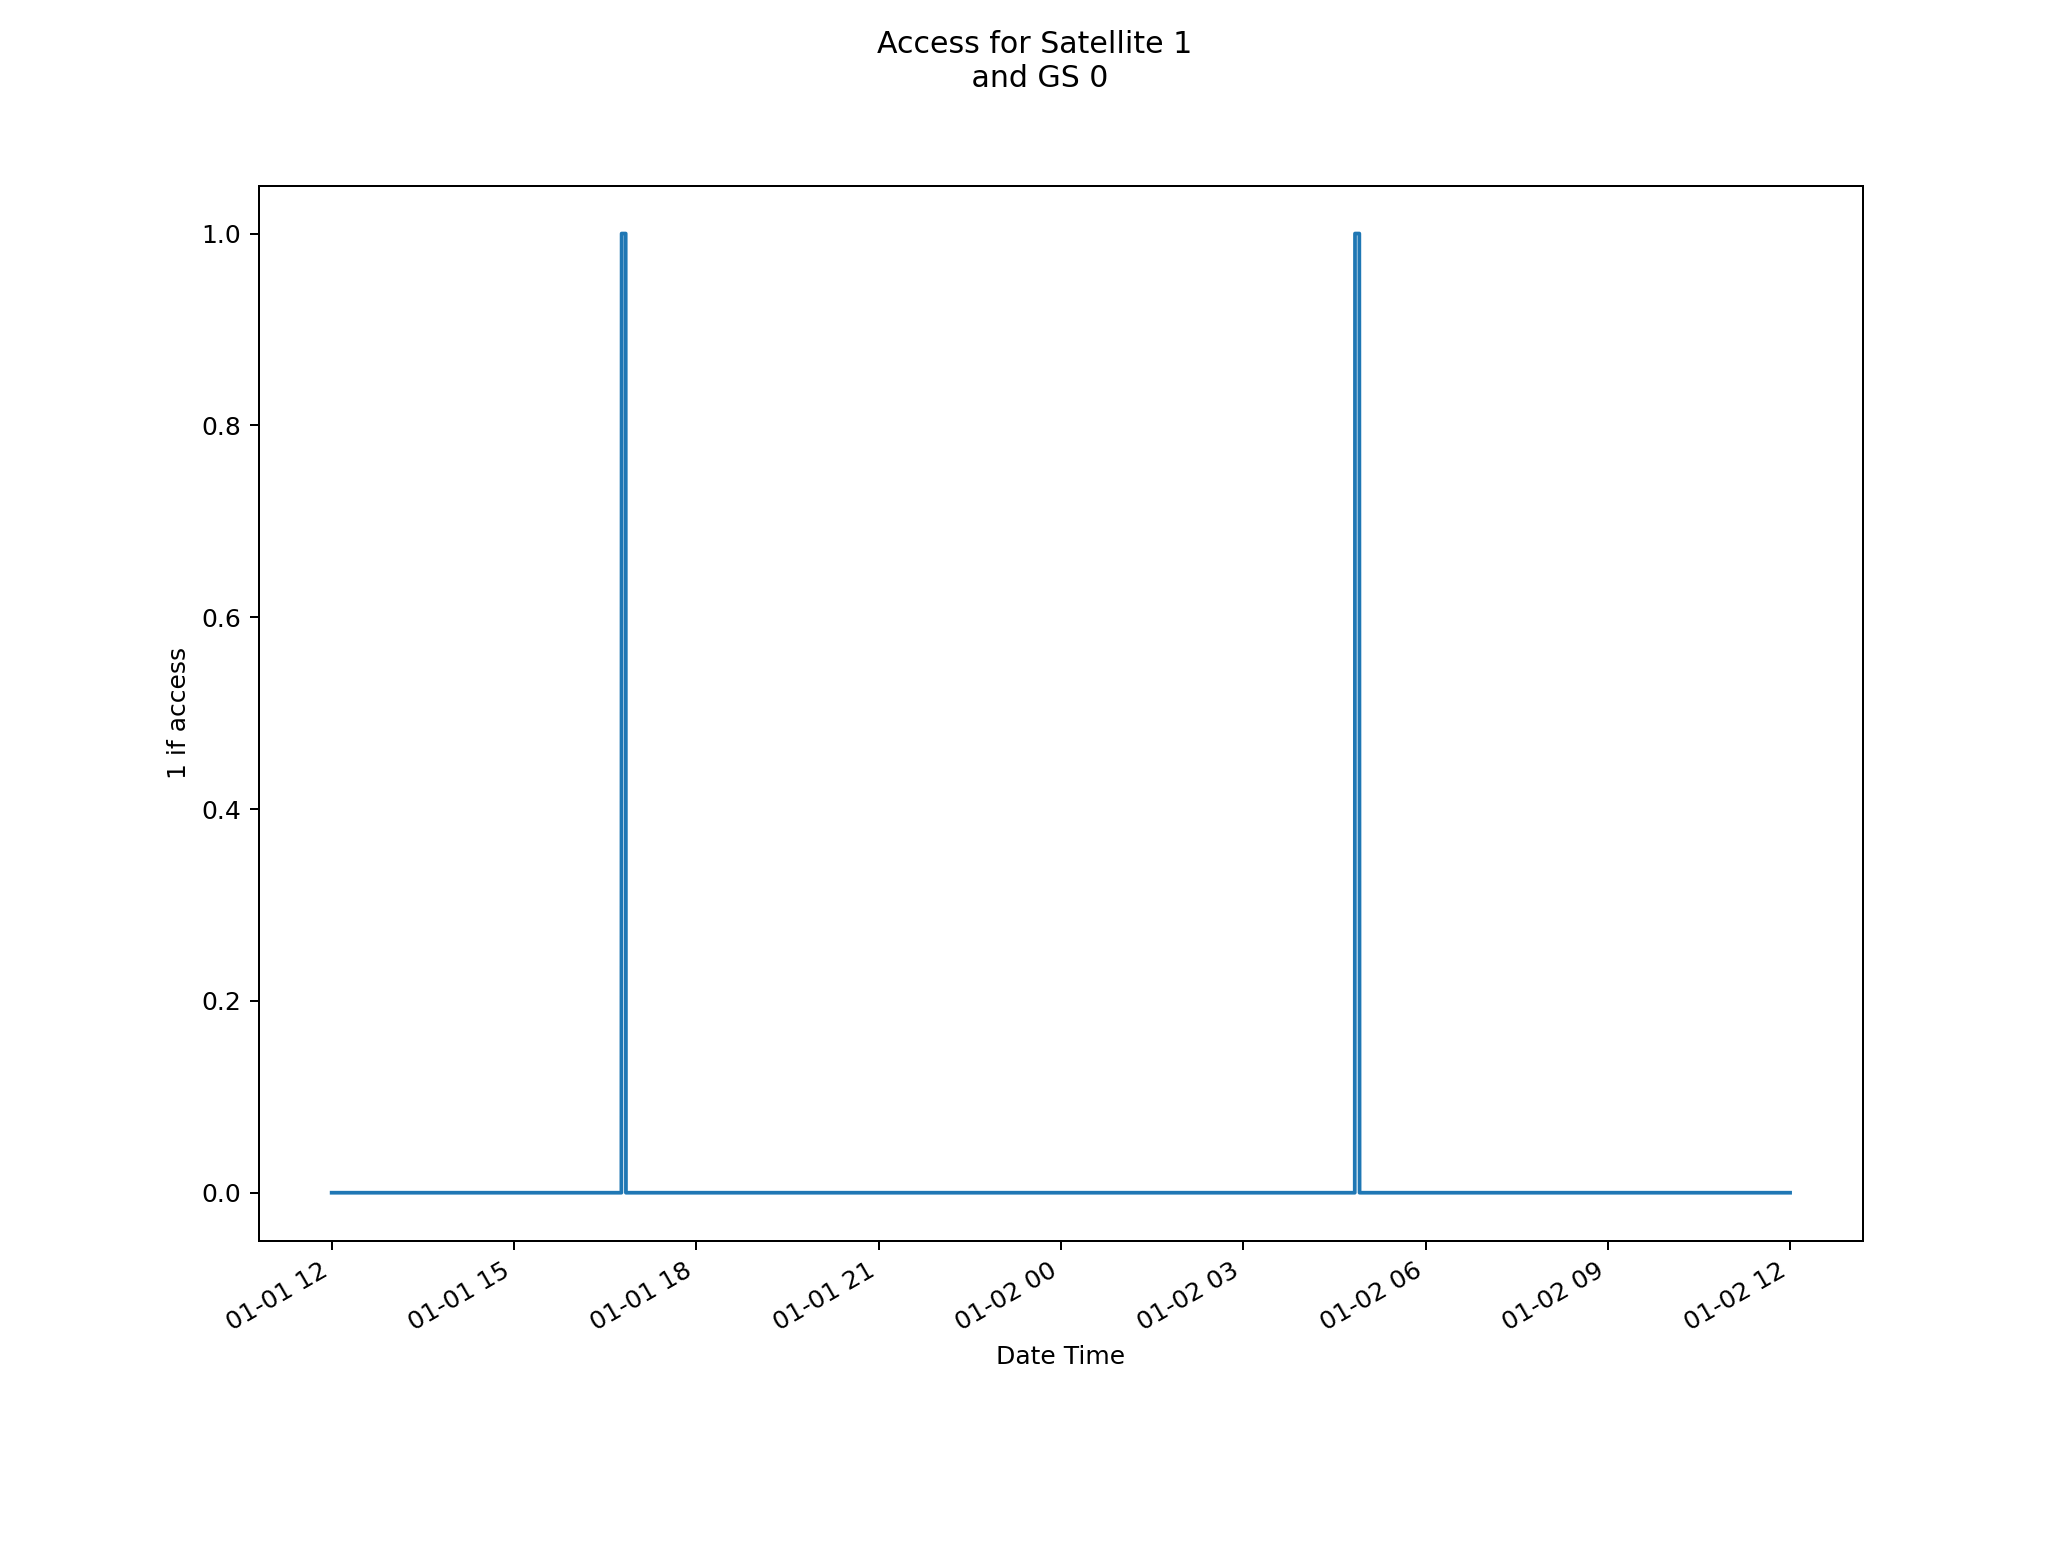

In [14]:
# Plot access tombstone plots. Access available when y axis is 1
accessData.plot_access()

<IPython.core.display.Javascript object>


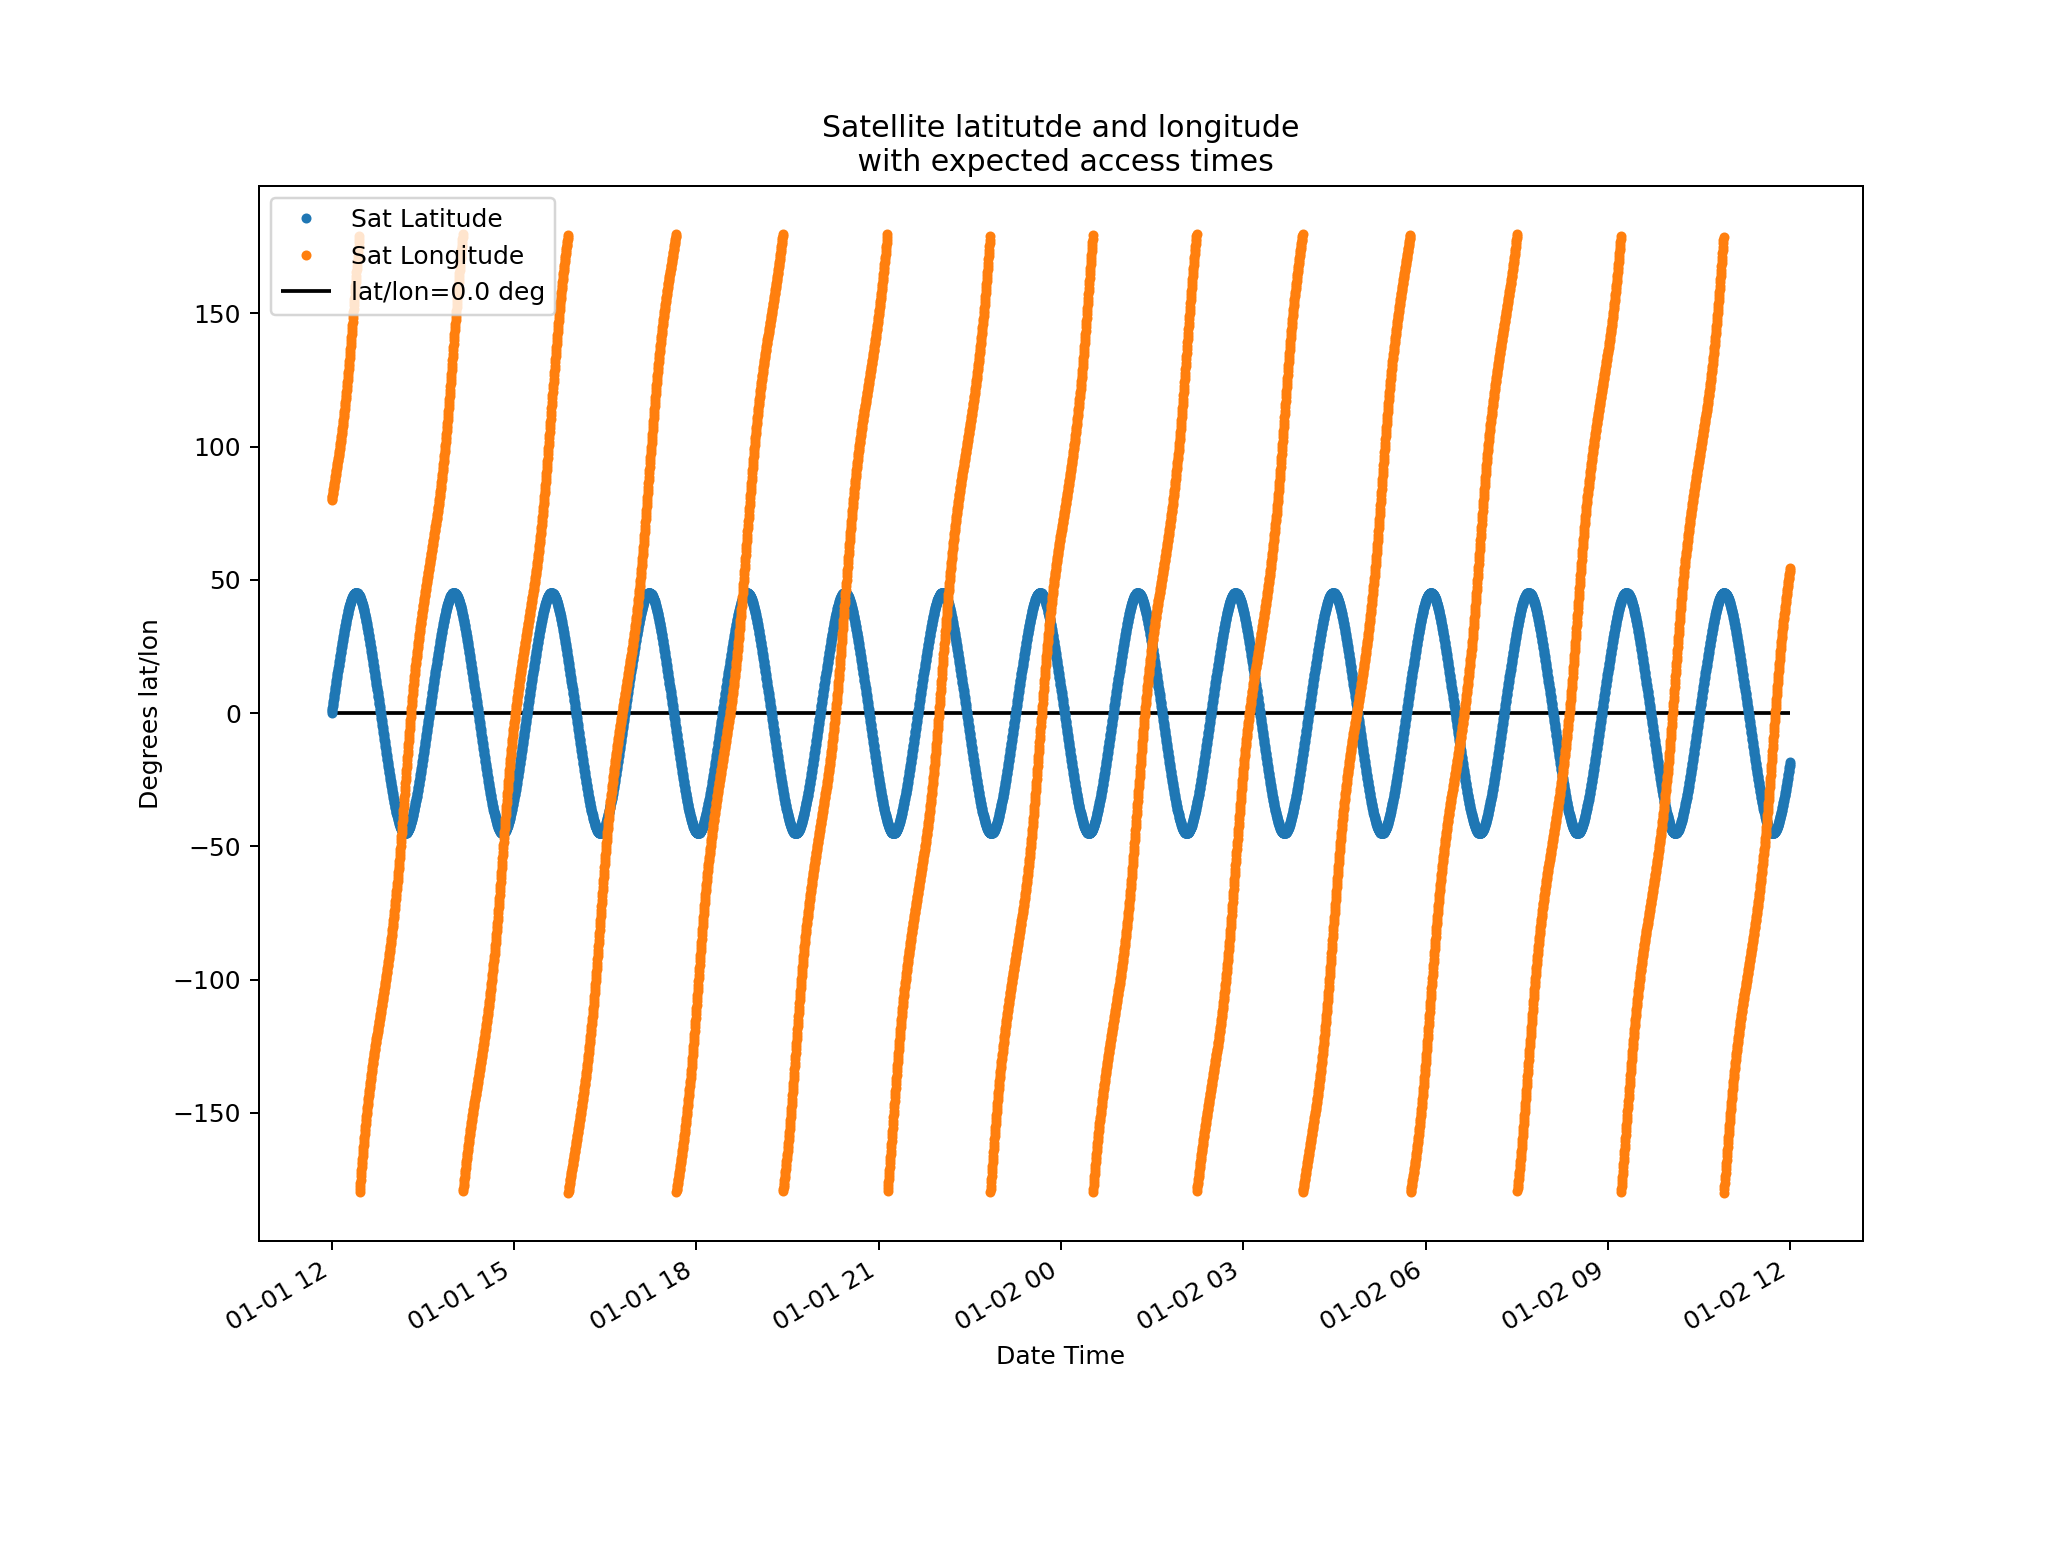

In [15]:
## Access points will be near when all three lines intersect (blue, orange, black)
## Use this plot to verify plots above are accurate
fig = plt.figure()

## MAKE SURE TO PLOT THE 'datetime' ATTRIBUTE OF 'orb1.rvTIMES'
plt.plot(orb1.rvTimes.datetime, orb1.LLA.lat, '.', label="Sat Latitude")
plt.plot(orb1.rvTimes.datetime, orb1.LLA.lon, '.', label = "Sat Longitude")
plt.hlines(ground_lon1.value, orb1.rvTimes.datetime[0], orb1.rvTimes.datetime[-1],
          colors='k', label=f'lat/lon={ground_lon1}')
plt.xlabel('Date Time')
plt.ylabel('Degrees lat/lon')
plt.title('Satellite latitutde and longitude\n with expected access times')
fig.autofmt_xdate()
plt.legend()

# Do similar analysis with constellation of satellites

## Generate Constellation

In [16]:
#create a walker constellation
i_walker = 60 * u.deg
alt_walker = 600 * u.km
t_walker = 6 #total number of satellites
p_walker = 2 #planes in constellation
f_walker = 0 #phase factor for walker constellations

constellation = cc.Constellation.from_walker(i_walker, t_walker, p_walker, 
                                             f_walker, alt_walker)

#Add remote sensor defined above to each satellite in the constellation
constellation.add_sensor_payload(remoteSensor)

/Users/manweichan/Desktop/MITPhD/SAS/code/.venv/lib/python3.7/site-packages/astropy/units/decorators.py:253: UserWarning:

Wrapping true anomaly to -π <= nu < π



### Plot constellation using poliastro interface

In [17]:
frame = constellation.plot()
frame.show()

## Propagate satellite constellation

In [18]:
constellation.get_rv_from_propagate(timeDeltas)

In [19]:
## Data in a constellation is organized as follows:
# The constellation objects has a planes attribute, which is a list of 
# plane objects
print('Below we see a python list with 2 plane objects')
print('which is how we described the Walker Constellation')
print('accessed using: constellation.planes')
print(constellation.planes)
print('\n')

## To access the plane, you need to index the list of planes
print('Get 1st plane: constellation.planes[0]')
print(constellation.planes[0])
print('\n')

## To access satellites in a plane, you need to access the 'sats' attribute
# in the planes object. The sats attribute is a list of satellites
print('Accessing the list of satellites we see there are 3 satellites in this plane')
print('Get satellites in the plane using: constellation.planes[0].sats')
print(constellation.planes[0].sats)
print('\n')

## You can access each of the satellites in the plane using list indexing
print('To access the 3rd satellite in the 1st plane, use: constellation.planes[0].sats[2]')
print(constellation.planes[0].sats[2])
print('\n')

## We can then access the satellite attributes like we had done before
print('Access satellite ECEF coordinates')
print(constellation.planes[0].sats[2].rvECEF)

Below we see a python list with 2 plane objects
which is how we described the Walker Constellation
accessed using: constellation.planes
[<constellationClasses.Plane object at 0x11fceb978>, <constellationClasses.Plane object at 0x1203af400>]


Get 1st plane: constellation.planes[0]


Accessing the list of satellites we see there are 3 satellites in this plane
Get satellites in the plane using: constellation.planes[0].sats
[6978 x 6978 km x 60.0 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT), 6978 x 6978 km x 60.0 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT), 6978 x 6978 km x 60.0 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT)]


To access the 3rd satellite in the 1st plane, use: constellation.planes[0].sats[2]
6978 x 6978 km x 60.0 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT)


Access satellite ECEF coordinates
<SkyCoord (ITRS: obstime=['J2000.000' 'J2000.000' 'J2000.000' ... 'J2000.003' 'J2000.003'
 'J2000.003']): (x, y, z) in km
    [(23

## Calculate access for the entire constellation

In [26]:
## Calculate access for the entire satellite constellation
# Set verbose to true to see which satellite/ground station is being calculated
constellationAccess = constellation.get_access(ground_target, verbose=True)
## Satellite 2 in plane 1 has no access intervals with the ground station
# As indicated by the output message

plane 1 out of 2
sat 1 out of 3
sat 2 out of 3
No Intervals Found
sat 3 out of 3
plane 2 out of 2
sat 1 out of 3
sat 2 out of 3
sat 3 out of 3


In [27]:
## The constellationAccess object is a list of the accesses calculated
# between the satellite/ground station pairs.
# An individual access object can be accessed using list indexing
# Which is a DataAccessSat object
print(constellationAccess.accessList[0].__dict__)

{'sat': 6978 x 6978 km x 60.0 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT), 'groundLoc': <constellationClasses.GroundLoc object at 0x11fa826d8>, 'fastRun': True, 'satID': 0, 'groundLocID': 0, 'groundIdentifier': 'target', 'accessIntervals': array([[<Time object: scale='tt' format='jyear_str' value=J2000.001>,
        <Time object: scale='tt' format='jyear_str' value=J2000.001>],
       [<Time object: scale='tt' format='jyear_str' value=J2000.002>,
        <Time object: scale='tt' format='jyear_str' value=J2000.002>]],
      dtype=object), 'accessMask': array([False, False, False, ..., False, False, False]), 'lam_max': <Quantity 0.15183734 rad>, 'groundRanges': <Quantity [1.39287857, 1.39992599, 1.4070083 , ..., 1.07601196, 1.08005828,
           1.08421327] rad>}


### Plots for constellation access

<IPython.core.display.Javascript object>


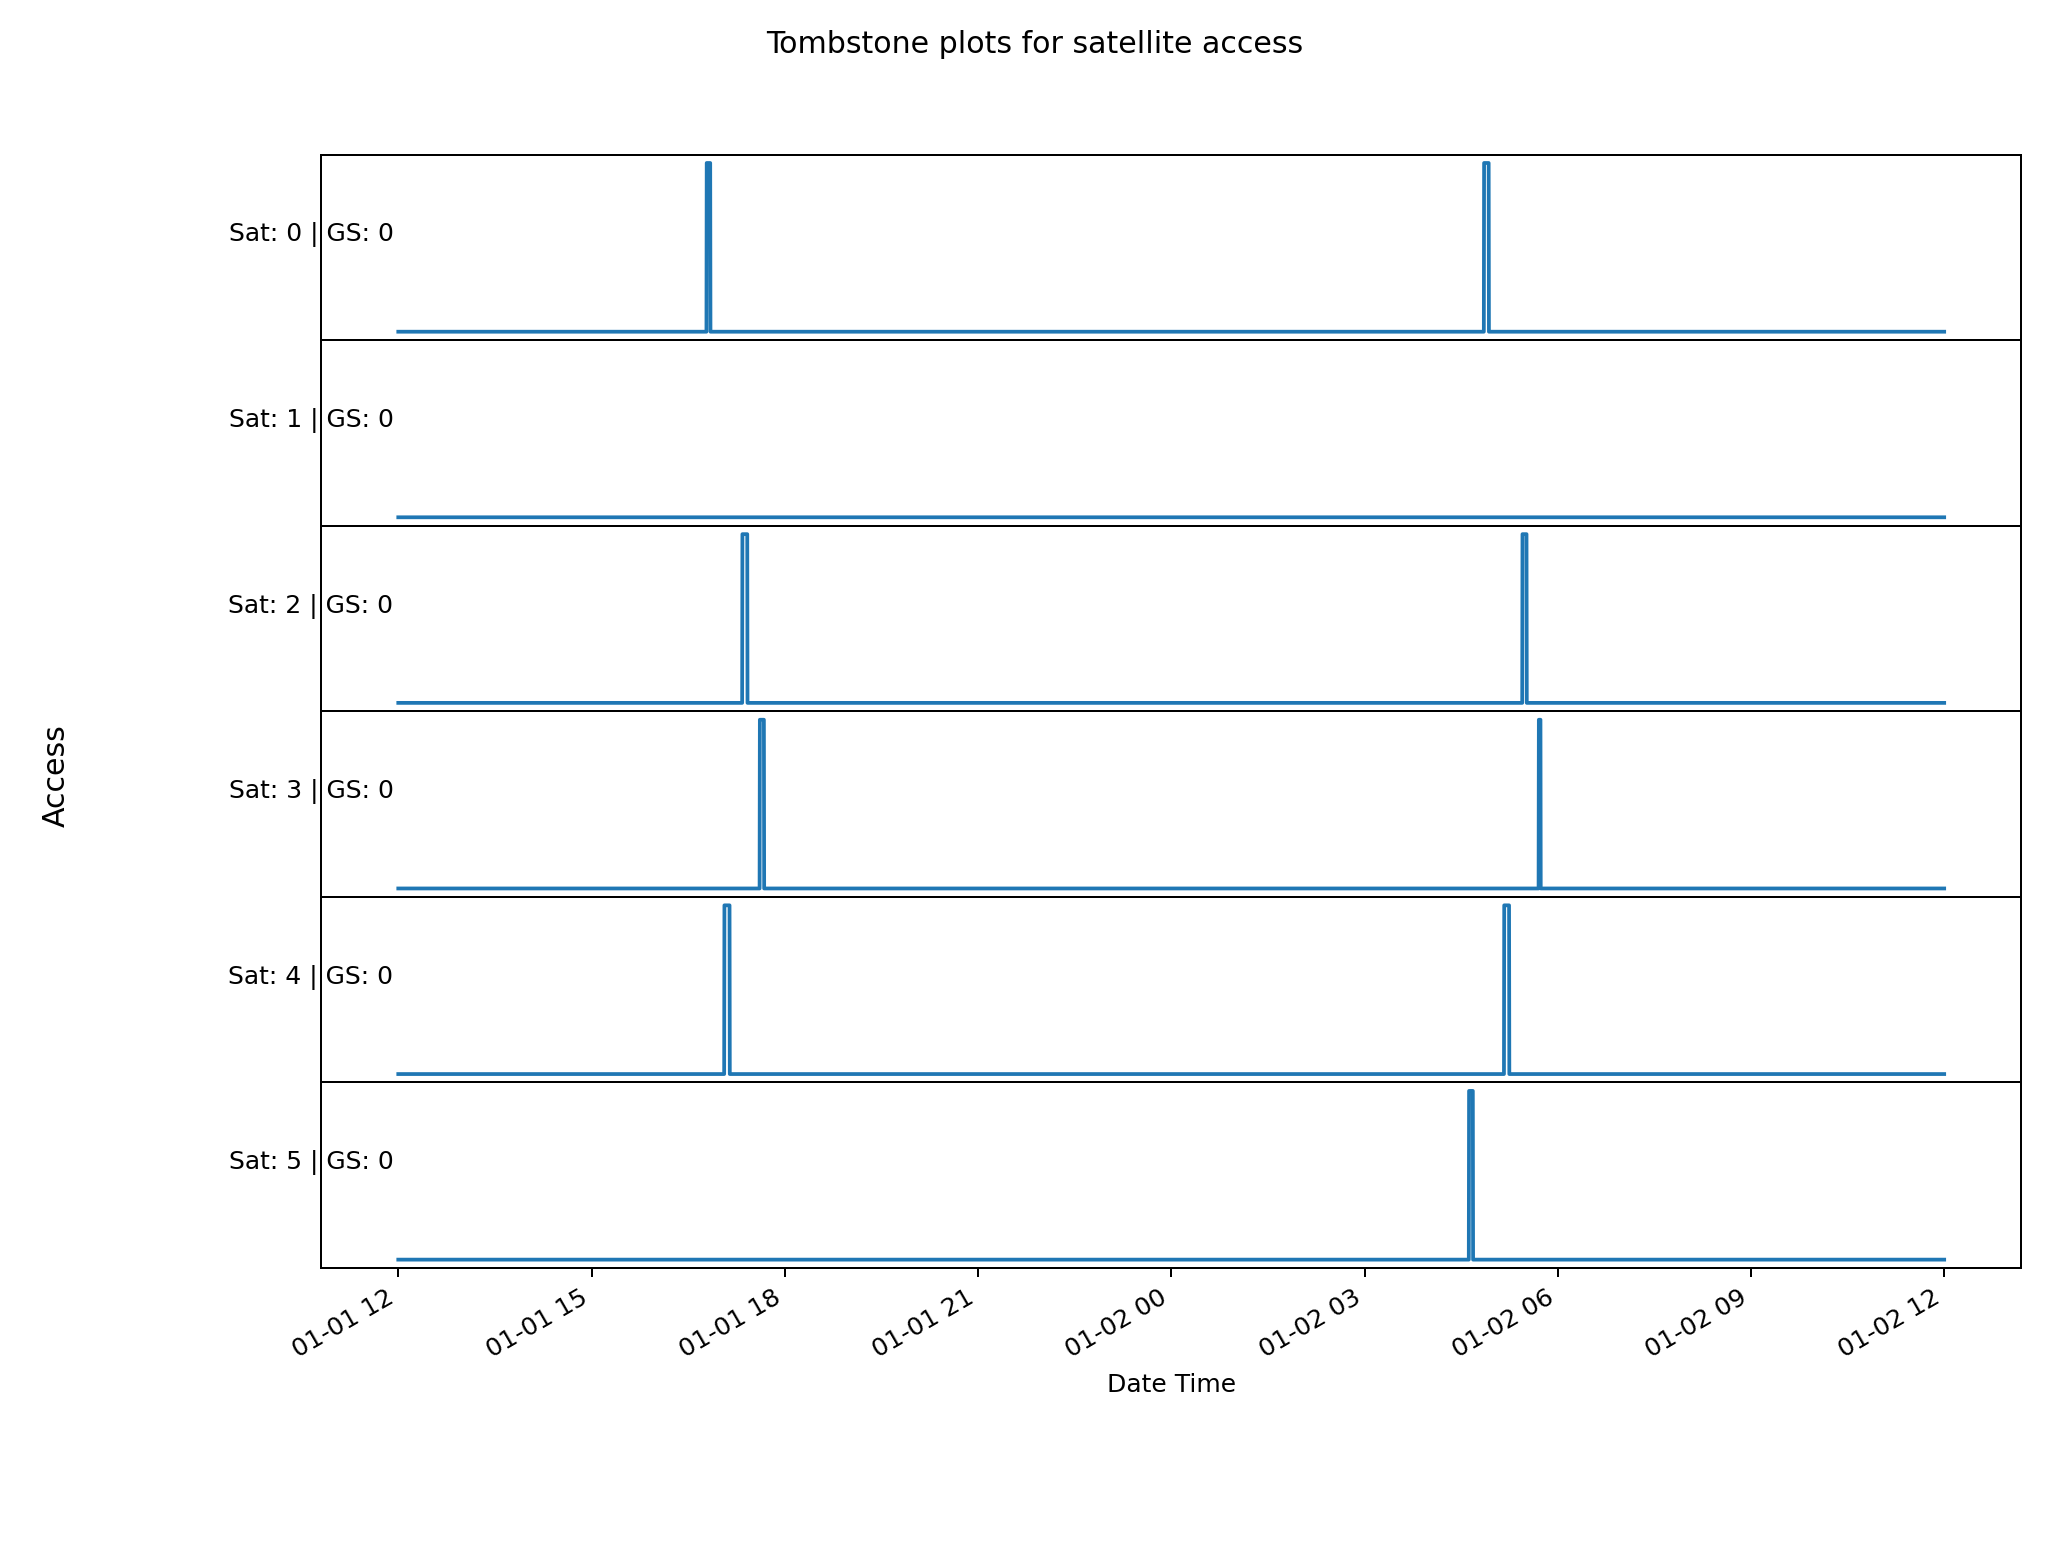

(array([<AxesSubplot:ylabel='Sat: 0 | GS: 0'>,
        <AxesSubplot:ylabel='Sat: 1 | GS: 0'>,
        <AxesSubplot:ylabel='Sat: 2 | GS: 0'>,
        <AxesSubplot:ylabel='Sat: 3 | GS: 0'>,
        <AxesSubplot:ylabel='Sat: 4 | GS: 0'>,
        <AxesSubplot:xlabel='Date Time', ylabel='Sat: 5 | GS: 0'>],
       dtype=object),
 <Figure size 640x480 with 6 Axes>)

In [28]:
## Plot tombstone plots for each of the satellites
constellationAccess.plot_all()

<IPython.core.display.Javascript object>


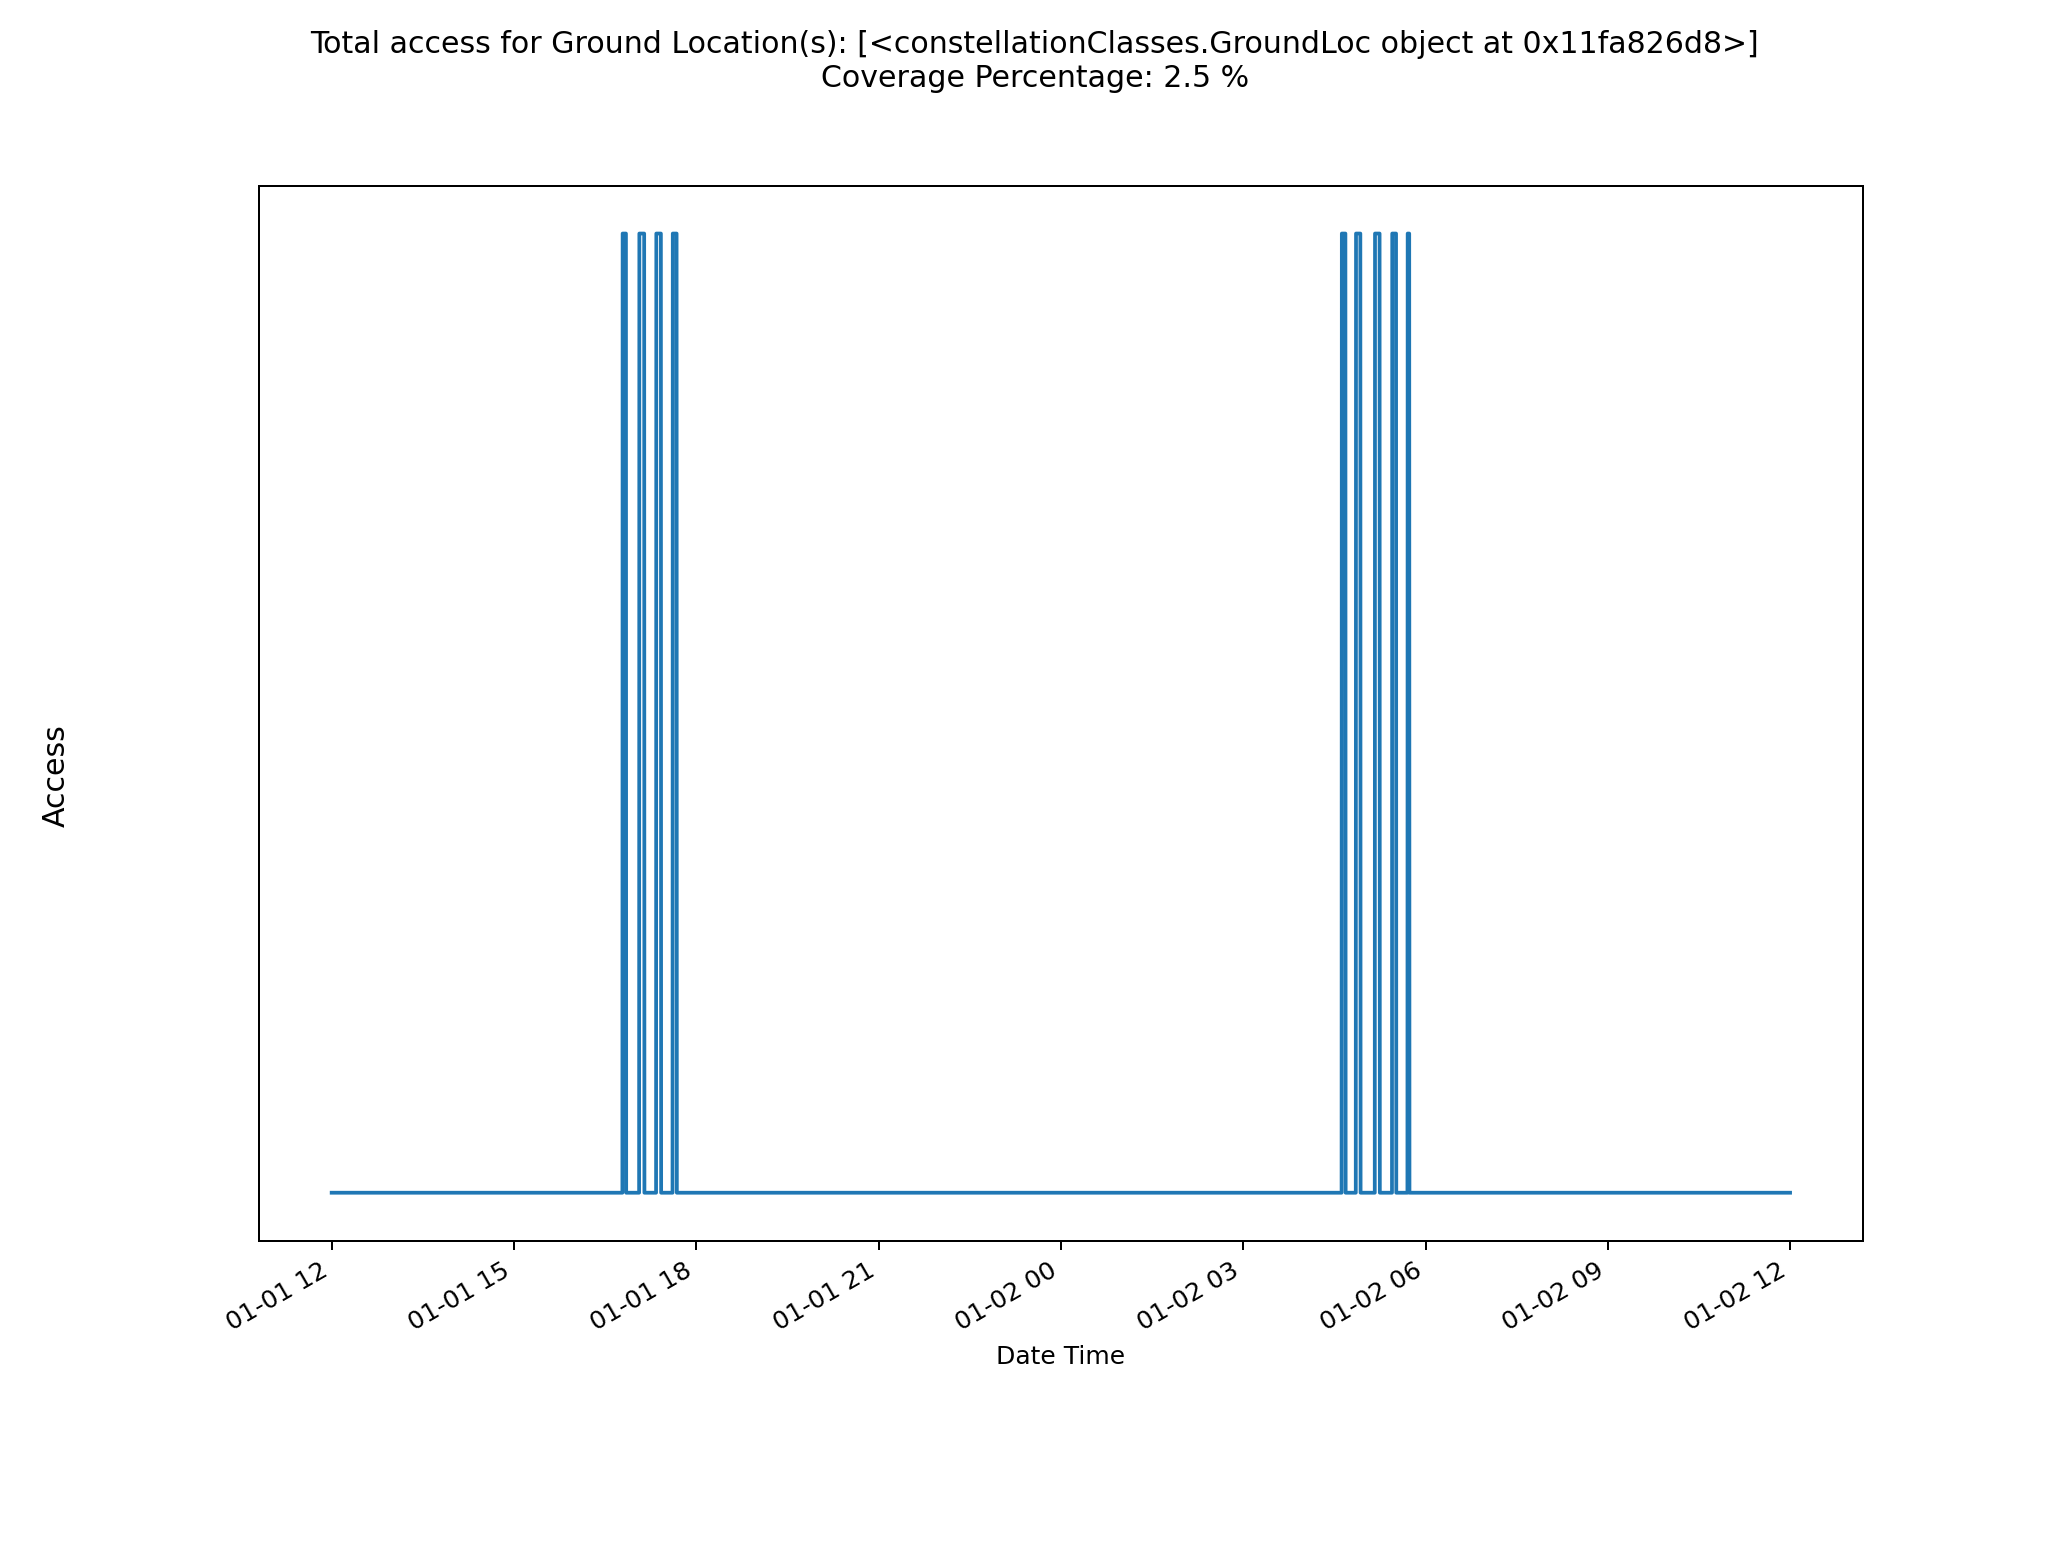

(<AxesSubplot:xlabel='Date Time'>, <Figure size 640x480 with 1 Axes>)

In [34]:
## You can plot access for the constellation as a whole
constellationAccess.plot_total_access(ground_target) #Input 0 as it is the groundLocID